# **Instal**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, mean_squared_error, mean_absolute_error, r2_score

# **Pengumpulan Data**

In [4]:
data = load_iris()
# Mengonversi ke DataFrame Pandas
df = pd.DataFrame(data.data, columns=data.feature_names)

# Menambahkan kolom target
df['Species'] = data.target

# Menampilkan 5 baris pertama
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **Data Preprocessing**

In [6]:
# Mengecek missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [8]:
unique_text = df['Species'].unique()
print(unique_text)

[0 1 2]


EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

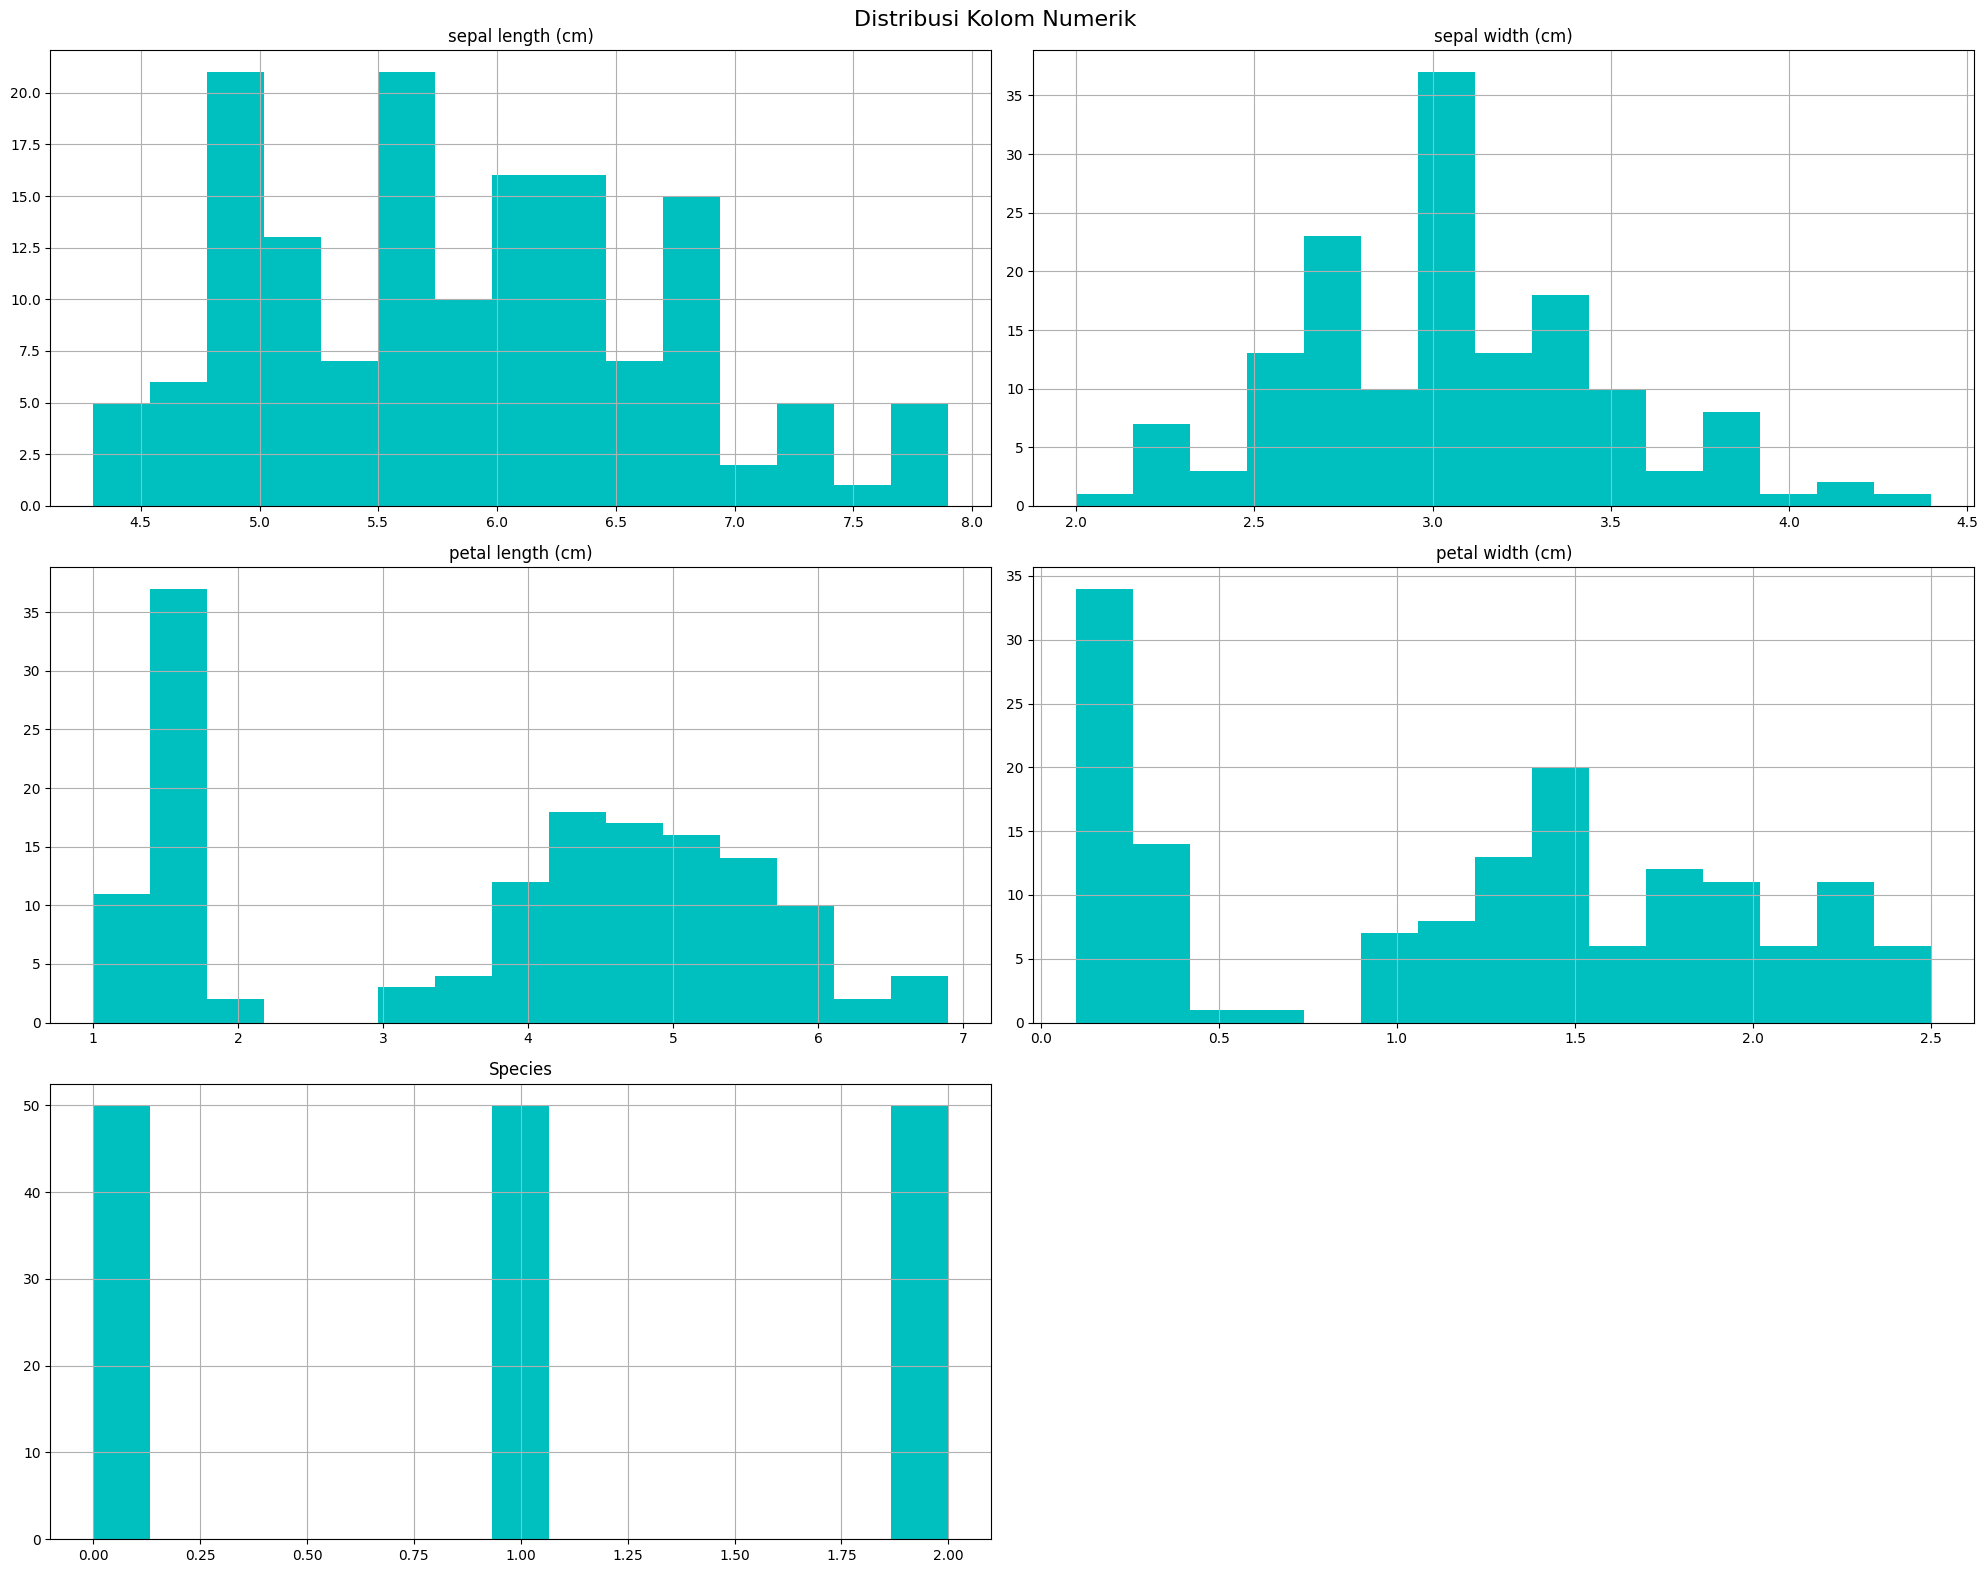

In [10]:
# Melihat distribusi kolom numerik
numeric_cols = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)', 'petal width (cm)',	'Species']
df[numeric_cols].hist(bins=15, figsize=(20, 16), color='c')
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.tight_layout()
plt.show()


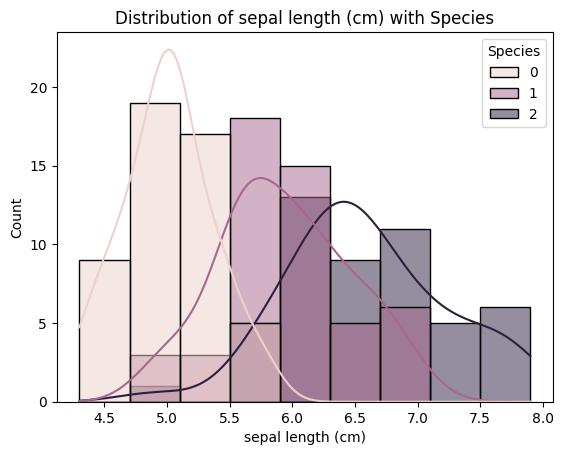

In [11]:
sns.histplot(data=df, x='sepal length (cm)', hue='Species', kde=True)
plt.title('Distribution of sepal length (cm) with Species')
plt.show()

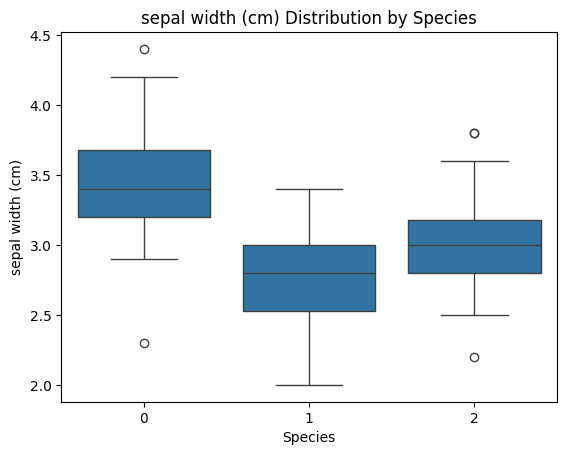

In [12]:
sns.boxplot(data=df, x='Species', y='sepal width (cm)')
plt.title('sepal width (cm) Distribution by Species')
plt.show()

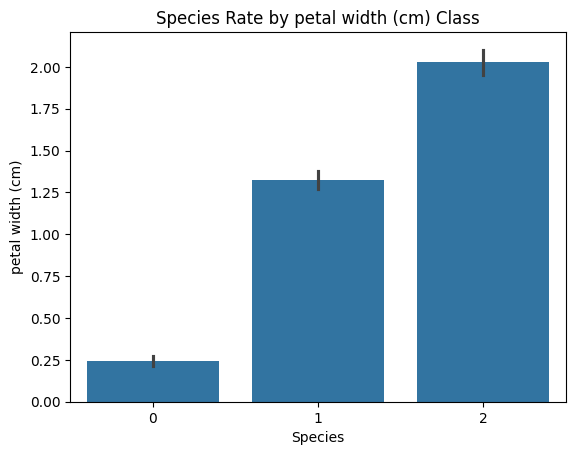

In [13]:
sns.barplot(data=df, x='Species', y='petal width (cm)')
plt.title('Species Rate by petal width (cm) Class')
plt.show()

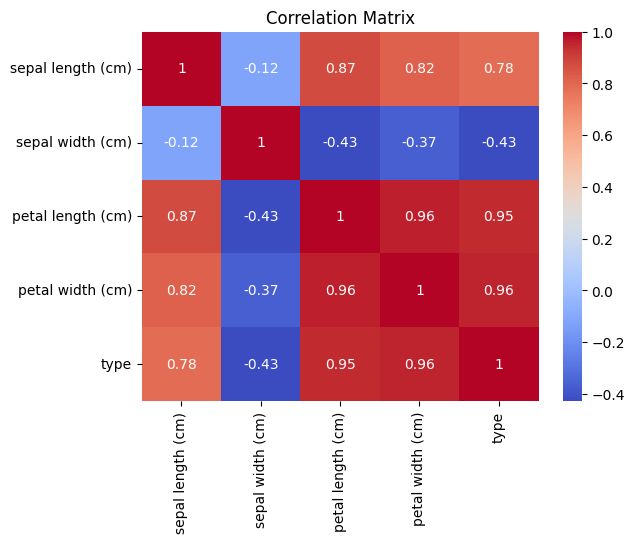

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **transformasi**

In [14]:
le = LabelEncoder()
df['sepal length (cm)'] = le.fit_transform(df['sepal length (cm)'])
df['sepal width (cm)'] = le.fit_transform(df['sepal width (cm)'])
df['petal length (cm)'] = le.fit_transform(df['petal length (cm)'])
df['petal width (cm)'] = le.fit_transform(df['petal width (cm)'])
df['Species'] = le.fit_transform(df['Species'])


In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


# **Feature Selection**

In [16]:
features = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)', 'petal width (cm)']
X = df[features]
y = df['Species']

# **Split Data**

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modeling**

Naive Bayes

In [18]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = model.predict(X_test)

In [21]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


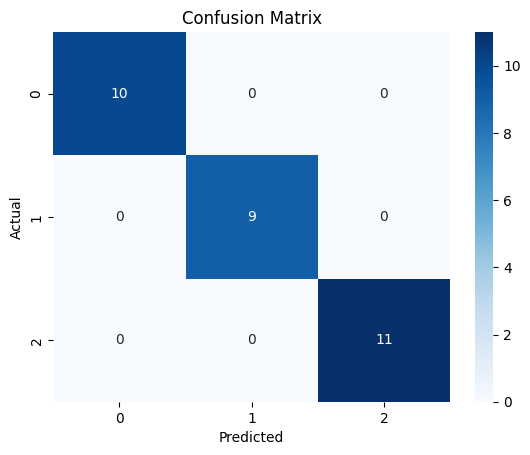

In [23]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Evaluasi**

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
